In [1]:
from __future__ import annotations
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from typing import List

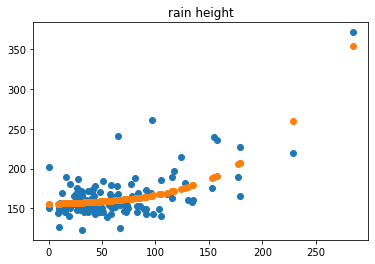

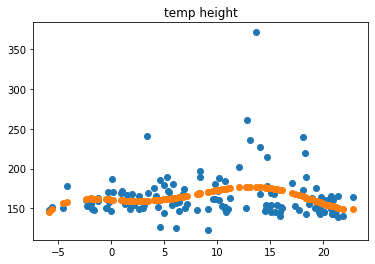

[39.445454545454545, 33.909090909090914, 35.42727272727273, 47.26363636363636, 102.68181818181819, 91.4909090909091, 98.44545454545455, 80.10909090909091, 68.17272727272729, 55.18181818181818, 44.20909090909091, 31.30909090909091]


In [68]:
df = pd.read_csv("tidy_data.csv")

plt.scatter(df["Rain_sum"],df["Height"])
z = np.polyfit(df["Rain_sum"], df["Height"], 3)
p = np.poly1d(z)
trend_h = p(df["Rain_sum"])
plt.scatter(df["Rain_sum"],trend_h)
plt.title("rain height")
plt.show()

plt.scatter(df["Mean_temp"],df["Height"])
z = np.polyfit(df["Mean_temp"], df["Height"], 5)
p = np.poly1d(z)
trend_h = p(df["Mean_temp"])
plt.scatter(df["Mean_temp"],trend_h)
plt.title("temp height")
plt.show()

y = 2009

frames = {}
for i in range(int(len(df)/12)):
    dfY = df.loc[df["Year"] == y]
    frames[y]=dfY
    y += 1
    pass


rain = [0]*12
height = [0]*12
temp = [0]*12

for df in frames.values():
    for i in range(1,len(df)+1):
        monthDf: pd.DataFrame
        monthDf = df.loc[ df["Month"] == i]

        rain[i-1] += monthDf["Rain_sum"].values[0]
        height[i-1] += monthDf["Height"].values[0]
        temp[i-1] += monthDf["Mean_temp"].values[0]


rain = [x / int(len(frames)) for x in rain]
height = [x / int(len(frames)) - 150 for x in height]
temp = [x / int(len(frames)) for x in temp]

print(rain)



[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
[39.445454545454545, 33.909090909090914, 35.42727272727273, 47.26363636363636, 102.68181818181819, 91.4909090909091, 98.44545454545455, 80.10909090909091, 68.17272727272729, 55.18181818181818, 44.20909090909091, 31.30909090909091]


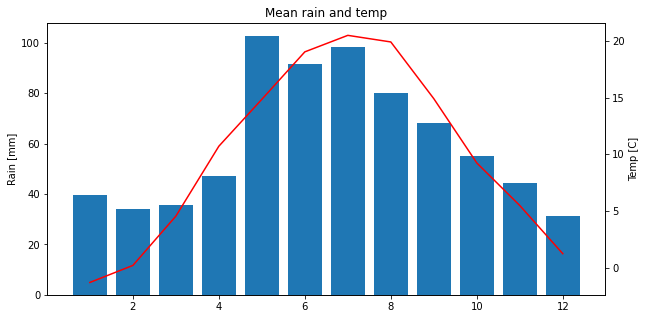

In [49]:
fig, ax1 = plt.subplots(figsize = (10, 5))
ax2 = ax1.twinx()

months = np.linspace(1,12,12).tolist()
print(months)
print(rain)
ax1.bar(months,rain)
ax1.set_ylabel("Rain [mm]")
ax2.plot(months,temp,'r')
ax2.set_ylabel("Temp [C]")
plt.title("Mean rain and temp")
plt.show()

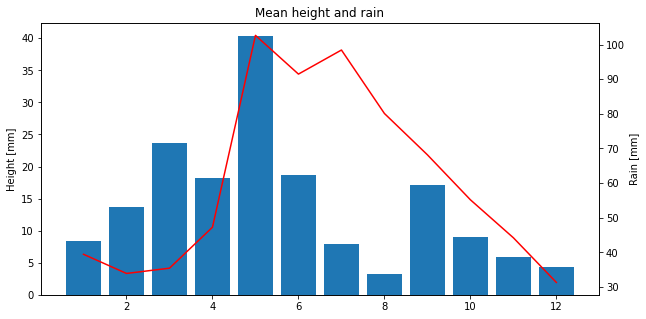

In [50]:
fig, ax1 = plt.subplots(figsize = (10, 5))
ax2 = ax1.twinx()

months = np.linspace(1,12,12).tolist()

ax1.bar(months,height)
ax1.set_ylabel("Height [mm]")
ax2.plot(months,rain,'r')
ax2.set_ylabel("Rain [mm]")
plt.title("Mean height and rain")
plt.show()

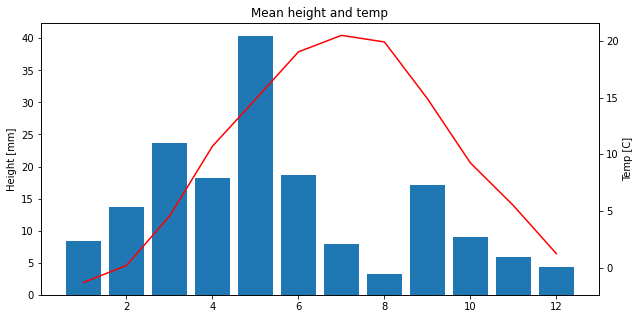

In [52]:
fig, ax1 = plt.subplots(figsize = (10, 5))
ax2 = ax1.twinx()

months = np.linspace(1,12,12).tolist()

ax1.bar(months,height)
ax1.set_ylabel("Height [mm]")
ax2.plot(months,temp,'r')
ax2.set_ylabel("Temp [C]")
plt.title("Mean height and temp")
plt.show()

In [ ]:
y = 2009

frames = {}
for i in range(int(len(df)/12)):
    dfY = df.loc[df["Year"] == y]
    frames[y]=dfY
    y += 1
    pass


rain_sum_summer = [0]*len(frames)
rain_day_summer = [0]*len(frames)

for df in frames.values():
    for i in range(1,len(df)+1):
        monthDf: pd.DataFrame
        monthDf = df.loc[ df["Month"] == i]

        rain[i-1] += monthDf["Rain_sum"].values[0]
        height[i-1] += monthDf["Height"].values[0]
        temp[i-1] += monthDf["Mean_temp"].values[0]


rain = [x / int(len(frames)) for x in rain]
height = [x / int(len(frames)) - 150 for x in height]
temp = [x / int(len(frames)) for x in temp]

print(rain)

{2009: 734.4000000000001, 2010: 1126.3, 2011: 563.3, 2012: 564.4000000000001, 2013: 760.0000000000001, 2014: 735.0, 2015: 684.6, 2016: 751.9999999999999, 2017: 797.2999999999998, 2018: 588.0, 2019: 698.8000000000001}
{2009: 134, 2010: 136, 2011: 115, 2012: 127, 2013: 110, 2014: 146, 2015: 113, 2016: 136, 2017: 146, 2018: 119, 2019: 127}


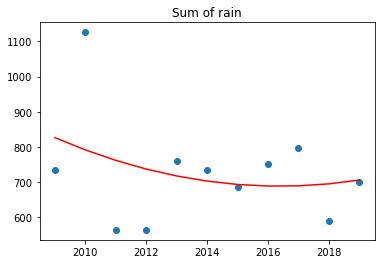

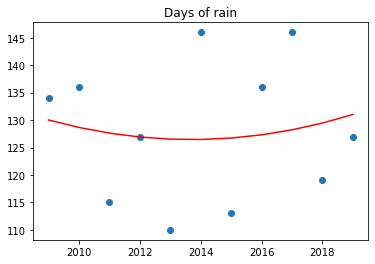

In [43]:
df = pd.read_csv("tidy_data.csv")
df = df.reset_index()

rain_sum_summer = dict()
rain_day_summer = dict()
months = range(1,13)

for index, row in df.iterrows():
    if row['Year'] not in rain_sum_summer.keys():
        rain_sum_summer[row['Year']] = 0
    if row['Year'] not in rain_day_summer.keys():
        rain_day_summer[row['Year']] = 0

    if row['Month'] in months:
        rain_sum_summer[row['Year']] += round(row['Rain_sum'], 2)
        rain_day_summer[row['Year']] += row['Days_w_rain']

print(rain_sum_summer)
print(rain_day_summer)

years = list(rain_sum_summer.keys())
values = list(rain_sum_summer.values())

plt.scatter(years, values)
z = np.polyfit(years, values, 2)
p = np.poly1d(z)
trend_h = p(years)
plt.plot(years,trend_h, "r-")
plt.title("Sum of rain")
plt.show()

years = list(rain_day_summer.keys())
values = list(rain_day_summer.values())

plt.scatter(years, values)
z = np.polyfit(years, values, 2)
p = np.poly1d(z)
trend_h = p(years)
plt.plot(years,trend_h, "r-")
plt.title("Days of rain")
plt.show()
